In [21]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [22]:
DATASET_PATH = "leapGestRecog"  
IMG_SIZE = 64

In [23]:
IMG_SIZE = 64
DATA_DIR = 'leapGestRecog'  # Replace with the correct path if needed
GESTURE_CLASSES = [
    '01_palm', '02_fist_moved', '03_fist', '04_thumb', '05_index',
    '06_ok', '07_palm_moved', '08_c', '09_down'
]
labels_dict = {cls: i for i, cls in enumerate(GESTURE_CLASSES)}

X, y = [], []

# Walk through all subject folders and collect images
for subject in os.listdir(DATA_DIR):
    subject_path = os.path.join(DATA_DIR, subject)
    if not os.path.isdir(subject_path):
        continue
    for gesture in os.listdir(subject_path):
        gesture_path = os.path.join(subject_path, gesture)
        if gesture not in GESTURE_CLASSES:
            continue
        for img_file in os.listdir(gesture_path):
            if img_file.endswith('.png'):
                img_path = os.path.join(gesture_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(labels_dict[gesture])
X = np.array(X)
y = np.array(y)

print(f"Total Samples: {len(X)}")
print(f"Shape of X: {X.shape}")
print(f"Length of y: {len(y)}")

Total Samples: 600
Shape of X: (600, 64, 64)
Length of y: 600


In [24]:
if X.shape[0] == 0:
    raise ValueError("Dataset not loaded properly. Please check folder structure and image paths.")

# Normalize and reshape
X = X / 255.0
X = X.reshape(-1, IMG_SIZE * IMG_SIZE)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report

# Get unique labels present in y_test (sorted to match y_pred)
unique_labels = sorted(np.unique(y_test))

# Filter GESTURE_CLASSES to match actual labels used
filtered_class_names = [GESTURE_CLASSES[i] for i in unique_labels]

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=filtered_class_names))




Accuracy: 1.0
Classification Report:

              precision    recall  f1-score   support

     01_palm       1.00      1.00      1.00        84
     03_fist       1.00      1.00      1.00        36

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



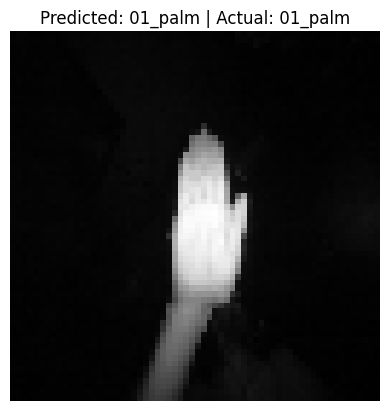

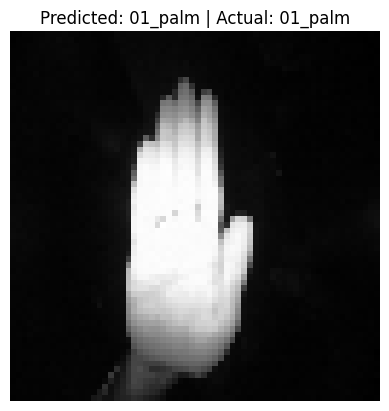

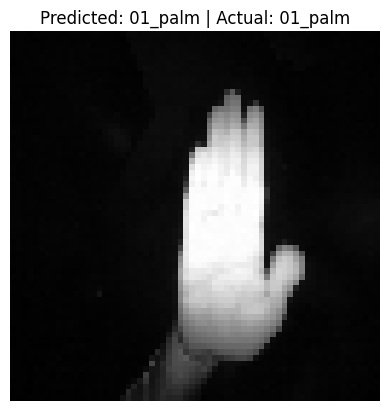

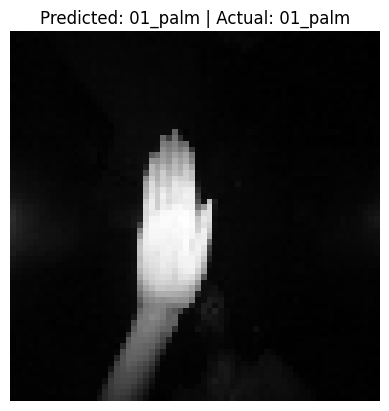

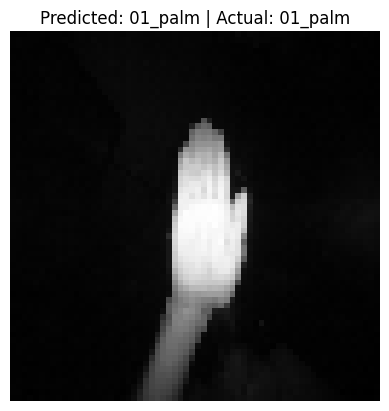

In [25]:
def show_prediction(index):
    img = X_test[index].reshape(IMG_SIZE, IMG_SIZE)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {GESTURE_CLASSES[y_pred[index]]} | Actual: {GESTURE_CLASSES[y_test[index]]}")
    plt.axis('off')
    plt.show()

# Show sample predictions
for i in range(5):
    show_prediction(i)